In [1]:
import pickle

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
# Load data from the text file
data_file = "data.txt"
data = np.loadtxt(data_file)

# Split data into features (X) and labels (y)
X = data[:, :-1]  # Features are all columns except the last one
y = data[:, -1]   # Labels are the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

In [3]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
}

search = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'),
                            param_distributions=param_grid,
                            n_iter=10,
                            cv=5,
                            scoring='accuracy',
                            n_jobs=-1,
                            random_state=42)

search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)
print("Best cross-validated accuracy:", search.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best cross-validated accuracy: 0.601010101010101


In [4]:
y_pred = search.predict(X_test)

In [5]:
emotion_labels = ['Anger', 'Happy', 'Neutral', 'Sad', 'Surprise']

predicted_labels = [emotion_labels[int(pred)] for pred in y_pred]
true_labels = [emotion_labels[int(true)] for true in y_test]

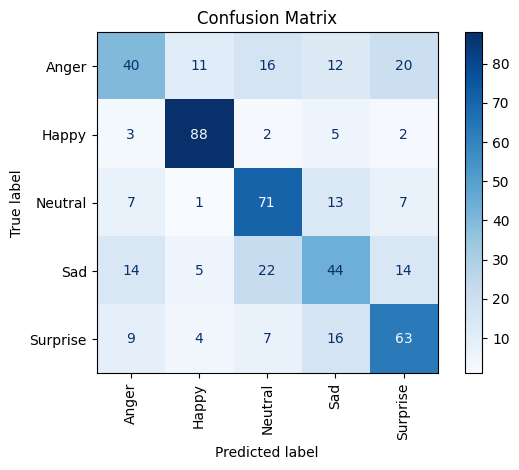

In [6]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=emotion_labels,
                                        xticks_rotation='vertical',
                                        cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=emotion_labels))


Classification Report:
              precision    recall  f1-score   support

       Anger       0.55      0.40      0.47        99
       Happy       0.81      0.88      0.84       100
     Neutral       0.60      0.72      0.65        99
         Sad       0.49      0.44      0.47        99
    Surprise       0.59      0.64      0.61        99

    accuracy                           0.62       496
   macro avg       0.61      0.62      0.61       496
weighted avg       0.61      0.62      0.61       496



In [8]:
with open('./model', 'wb') as f:
    pickle.dump(search, f)